<a href="https://colab.research.google.com/github/GavenDcosta/ML_codes/blob/main/diabetes_Bagging_Classify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [3]:
# Step 1: Load the dataset
url = '/content/diabetes.csv'
data = pd.read_csv(url)

# Display the first few rows of the dataset
print(data.head())
print(data.info())
print(data.describe())

# Check the shape of the dataset
print(f'Dataset shape: {data.shape}')

# Check for missing values
print(data.isnull().sum())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768

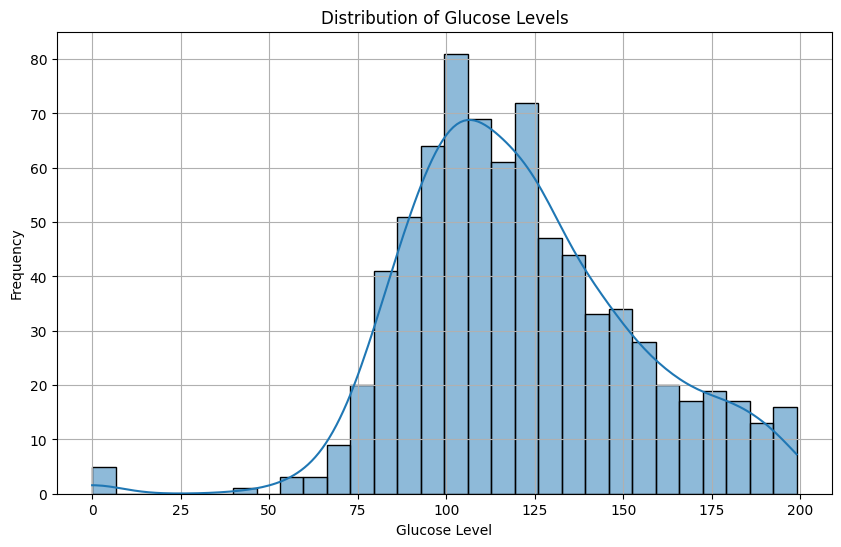

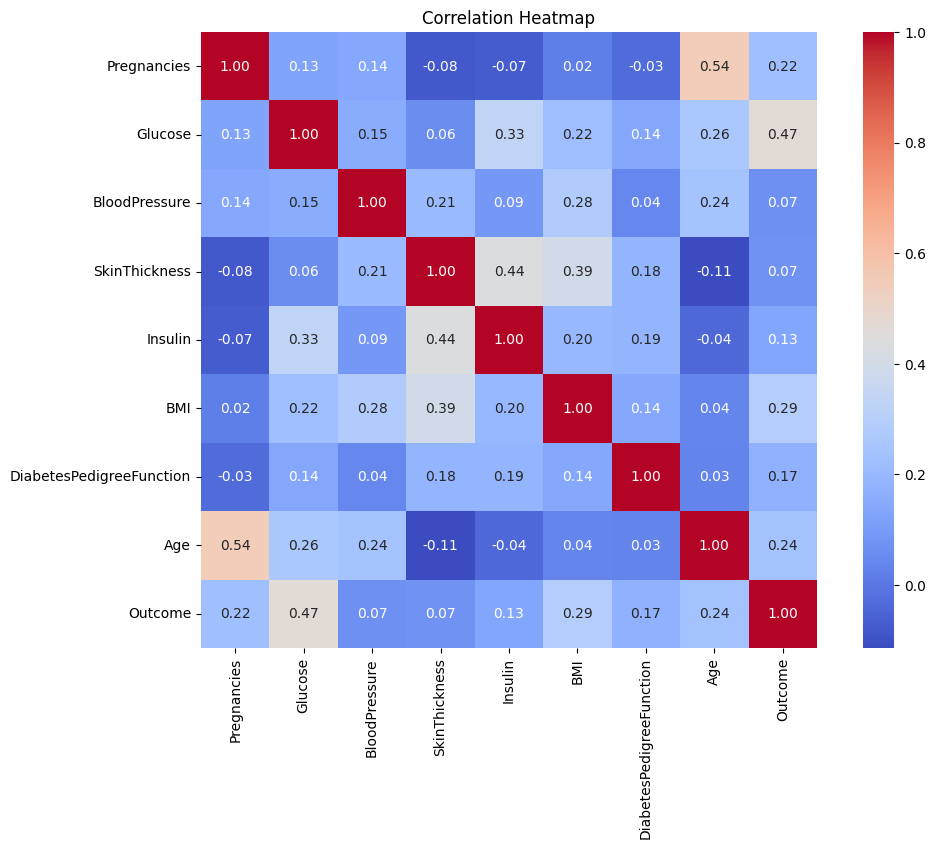

In [4]:
# Step 2: Exploratory Data Analysis (EDA)

# Display the distribution of the 'Glucose' feature
plt.figure(figsize=(10, 6))
sns.histplot(data['Glucose'], bins=30, kde=True)
plt.title('Distribution of Glucose Levels')
plt.xlabel('Glucose Level')
plt.ylabel('Frequency')
plt.grid()
plt.show()

# Display the heatmap for feature correlation
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()


In [5]:
# Step 3: Prepare data for modeling
X = data.drop('Outcome', axis=1)  # Features
y = data['Outcome']                 # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# Step 4: Create ML models
# 4.1 Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Predictions and evaluation for Decision Tree
y_pred_dt = dt_classifier.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print(f'Decision Tree Accuracy: {dt_accuracy:.2f}')
print(classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.75
              precision    recall  f1-score   support

           0       0.83      0.76      0.79        99
           1       0.62      0.73      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



In [8]:
# Initialize the BaggingClassifier with the correct argument
bagging_classifier = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
bagging_classifier.fit(X_train, y_train)

# Predictions and evaluation for Bagging Classifier
y_pred_bagging = bagging_classifier.predict(X_test)
bagging_accuracy = accuracy_score(y_test, y_pred_bagging)
print(f'Bagging Classifier Accuracy: {bagging_accuracy:.2f}')
print(classification_report(y_test, y_pred_bagging))


Bagging Classifier Accuracy: 0.75
              precision    recall  f1-score   support

           0       0.82      0.78      0.80        99
           1       0.63      0.69      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



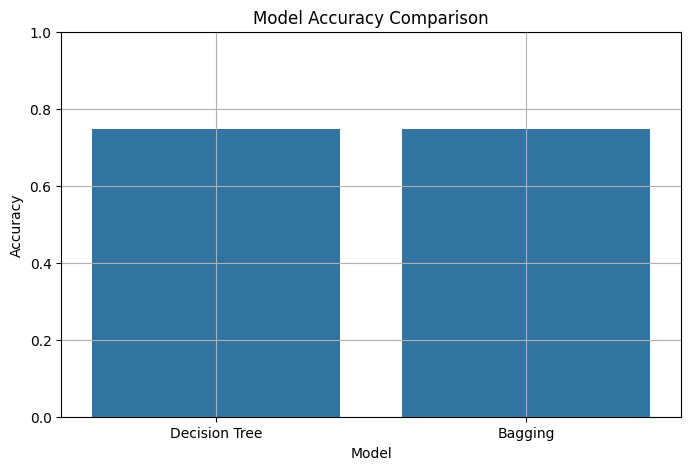

In [9]:
# Step 5: Compare performance of both models
models = ['Decision Tree', 'Bagging']
accuracies = [dt_accuracy, bagging_accuracy]

# Visualization of results
plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=accuracies)
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.grid()
plt.show()


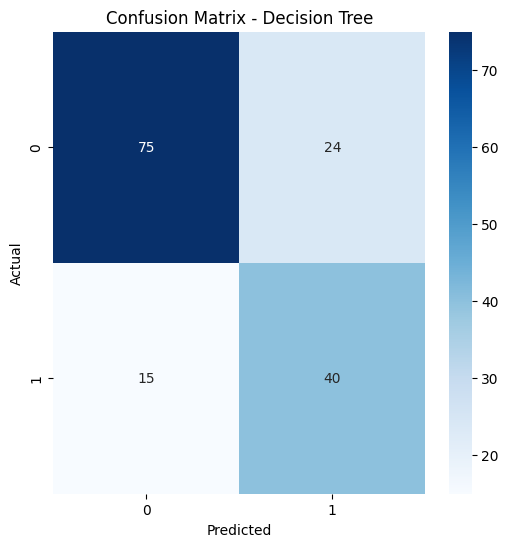

In [10]:
# Confusion Matrix for Decision Tree
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


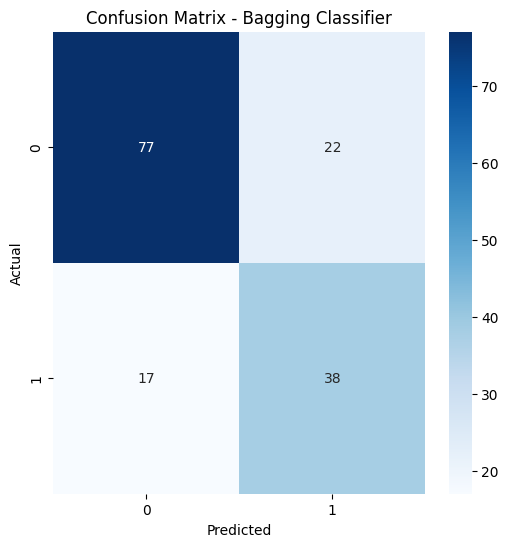

In [11]:
# Confusion Matrix for Bagging Classifier
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_bagging), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Bagging Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
